# **Classificação de interferências em bancos de dados CAE 3D**

## **Carregar base de Dados**

In [28]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Importação dos dados
data = pd.read_csv('dataset.csv')
data.head()

,OID,Class_Item_A,Element_Type_A,LOCATION_A,DISC_A,Class_Item_B,Element_Type_B,LOCATION_B,DISC_B,POS_X,POS_Y,POS_Z,VolA,VolB,VolClash,perc_VolA,perc_VolB,QTD_INTERF_A,QTD_INTERF_B,QTD_AREA_INTERFERED,Graudeparentesco,clash_on_object,gravidade
0,000249F1-0000-0000-0345-0064AD5B8A05,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,20.667023,-27.751444,24.899990,0.158530,0.158530,0.156580,0.987699,9.876993e-01,1,1,2,6,edge,0
1,000249F1-0000-0000-0544-0064AD5B8A05,CSPSSlabEntity,STRUCTURE,ENGINE_ROOM,OUTFITTING,CPInterferenceVolume,VOLUME,Escape Route,SAFETY,21.647000,-23.267988,31.074724,0.000035,4698.842197,0.000035,1.000000,7.370000e-09,3,243,3,0,face,0
2,000249F1-0000-0000-1145-0064AD5B8A05,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,21.172977,-27.786556,30.899990,0.158530,0.158530,0.156580,0.987699,9.876993e-01,2,2,2,6,edge,0
3,000249F1-0000-0000-1637-0064AD5B8A05,CSPSSlabEntity,STRUCTURE,CARGO-SHIP_SIDES,OUTFITTING,CPInterferenceVolume,VOLUME,Escape Route,SAFETY,70.348542,-25.814270,31.047612,0.000022,34113.608340,0.000010,0.441326,2.900000e-10,3,1237,1,0,edge,0
4,000249F1-0000-0000-1FAA-0064AD5B8A05,CPRtePipeComponentOcc,PIPING,UTILITY_MODULE,PIPING,CHgrCableTraySupport,CABLE TRAY SUPPORT,UTILITY_MODULE,ELECTRICAL,76.237734,-12.342850,44.614443,0.000522,0.088563,0.000089,0.170080,1.002130e-03,1,6,0,1,edge,1


## **Pré-Processamento**

**Retirar Coluna OID**

In [30]:
data=data.loc[:,data.columns != 'OID']
data.head()

,Class_Item_A,Element_Type_A,LOCATION_A,DISC_A,Class_Item_B,Element_Type_B,LOCATION_B,DISC_B,POS_X,POS_Y,POS_Z,VolA,VolB,VolClash,perc_VolA,perc_VolB,QTD_INTERF_A,QTD_INTERF_B,QTD_AREA_INTERFERED,Graudeparentesco,clash_on_object,gravidade
0,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,20.667023,-27.751444,24.899990,0.158530,0.158530,0.156580,0.987699,9.876993e-01,1,1,2,6,edge,0
1,CSPSSlabEntity,STRUCTURE,ENGINE_ROOM,OUTFITTING,CPInterferenceVolume,VOLUME,Escape Route,SAFETY,21.647000,-23.267988,31.074724,0.000035,4698.842197,0.000035,1.000000,7.370000e-09,3,243,3,0,face,0
2,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,CPRtePipeComponentOcc,PIPING,AFT-ABOVE_ENGINE_ROOM,PIPING,21.172977,-27.786556,30.899990,0.158530,0.158530,0.156580,0.987699,9.876993e-01,2,2,2,6,edge,0
3,CSPSSlabEntity,STRUCTURE,CARGO-SHIP_SIDES,OUTFITTING,CPInterferenceVolume,VOLUME,Escape Route,SAFETY,70.348542,-25.814270,31.047612,0.000022,34113.608340,0.000010,0.441326,2.900000e-10,3,1237,1,0,edge,0
4,CPRtePipeComponentOcc,PIPING,UTILITY_MODULE,PIPING,CHgrCableTraySupport,CABLE TRAY SUPPORT,UTILITY_MODULE,ELECTRICAL,76.237734,-12.342850,44.614443,0.000522,0.088563,0.000089,0.170080,1.002130e-03,1,6,0,1,edge,1


**Visualizar e retirar Missing**

In [33]:
data.describe()

,POS_X,POS_Y,POS_Z,VolA,VolB,VolClash,perc_VolA,perc_VolB,QTD_INTERF_A,QTD_INTERF_B,QTD_AREA_INTERFERED,Graudeparentesco,gravidade
count,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000,23678.000000
mean,71.313123,-2.251894,32.694341,533.883422,627.193379,4.420906,0.205015,0.336138,443.486697,201.996875,1.325619,1.888208,0.188023
std,92.567031,15.850204,8.992784,1349.537190,3707.958069,71.758844,0.333424,0.401503,1118.331671,667.254641,1.114539,1.991780,0.390738
min,-8.025000,-37.429598,-0.095803,0.000000,0.000001,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000135,-14.974750,30.896811,0.003179,0.001966,0.000147,0.000165,0.002766,2.000000,2.000000,1.000000,0.000000,0.000000
50%,21.702382,-3.825874,33.820629,0.038423,0.013661,0.000893,0.020840,0.090087,4.000000,3.000000,1.000000,1.000000,0.000000
75%,80.096882,10.630480,36.908159,14.534970,0.358664,0.006384,0.243681,0.759761,34.000000,9.000000,2.000000,3.000000,0.000000
max,291.205800,34.703274,61.707906,5052.163525,51806.987300,3517.610194,1.000000,1.000000,4205.000000,4171.000000,6.000000,9.000000,1.000000


In [34]:
data.dtypes

Class_Item_A            object
Element_Type_A          object
LOCATION_A              object
DISC_A                  object
Class_Item_B            object
Element_Type_B          object
LOCATION_B              object
DISC_B                  object
POS_X                  float64
POS_Y                  float64
POS_Z                  float64
VolA                   float64
VolB                   float64
VolClash               float64
perc_VolA              float64
perc_VolB              float64
QTD_INTERF_A             int64
QTD_INTERF_B             int64
QTD_AREA_INTERFERED      int64
Graudeparentesco         int64
clash_on_object         object
gravidade                int64
dtype: object

In [35]:
data.isnull().sum()

Class_Item_A           0
Element_Type_A         6
LOCATION_A             0
DISC_A                 4
Class_Item_B           0
Element_Type_B         2
LOCATION_B             0
DISC_B                 0
POS_X                  0
POS_Y                  0
POS_Z                  0
VolA                   0
VolB                   0
VolClash               0
perc_VolA              0
perc_VolB              0
QTD_INTERF_A           0
QTD_INTERF_B           0
QTD_AREA_INTERFERED    0
Graudeparentesco       0
clash_on_object        0
gravidade              0
dtype: int64

In [36]:
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
data.describe()

,POS_X,POS_Y,POS_Z,VolA,VolB,VolClash,perc_VolA,perc_VolB,QTD_INTERF_A,QTD_INTERF_B,QTD_AREA_INTERFERED,Graudeparentesco,gravidade
count,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000,23666.000000
mean,71.299144,-2.258063,32.694047,533.811975,627.108313,4.423145,0.205091,0.336259,443.483647,201.768106,1.325953,1.888997,0.188118
std,92.543993,15.851545,8.994800,1349.447929,3708.686626,71.776966,0.333490,0.401538,1118.389416,666.969655,1.114672,1.991949,0.390815
min,-8.025000,-37.429598,-0.095803,0.000000,0.000001,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,13.005000,-14.975000,30.896811,0.003179,0.001966,0.000147,0.000165,0.002796,2.000000,2.000000,1.000000,0.000000,0.000000
50%,21.703578,-3.849500,33.820819,0.038423,0.013653,0.000893,0.020786,0.090192,4.000000,3.000000,1.000000,1.000000,0.000000
75%,80.083625,10.630480,36.905757,14.534970,0.357202,0.006396,0.243681,0.759789,34.000000,9.000000,2.000000,3.000000,0.000000
max,291.205800,34.703274,61.707906,5052.163525,51806.987300,3517.610194,1.000000,1.000000,4205.000000,4171.000000,6.000000,9.000000,1.000000


In [37]:
data.isnull().sum()

Class_Item_A           0
Element_Type_A         0
LOCATION_A             0
DISC_A                 0
Class_Item_B           0
Element_Type_B         0
LOCATION_B             0
DISC_B                 0
POS_X                  0
POS_Y                  0
POS_Z                  0
VolA                   0
VolB                   0
VolClash               0
perc_VolA              0
perc_VolB              0
QTD_INTERF_A           0
QTD_INTERF_B           0
QTD_AREA_INTERFERED    0
Graudeparentesco       0
clash_on_object        0
gravidade              0
dtype: int64

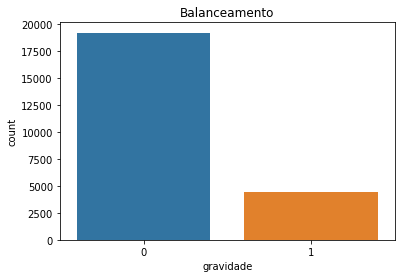

In [38]:
# Visualizar Balanceamento
sns.countplot(data=data, x='gravidade')
plt.title('Balanceamento')
plt.show()

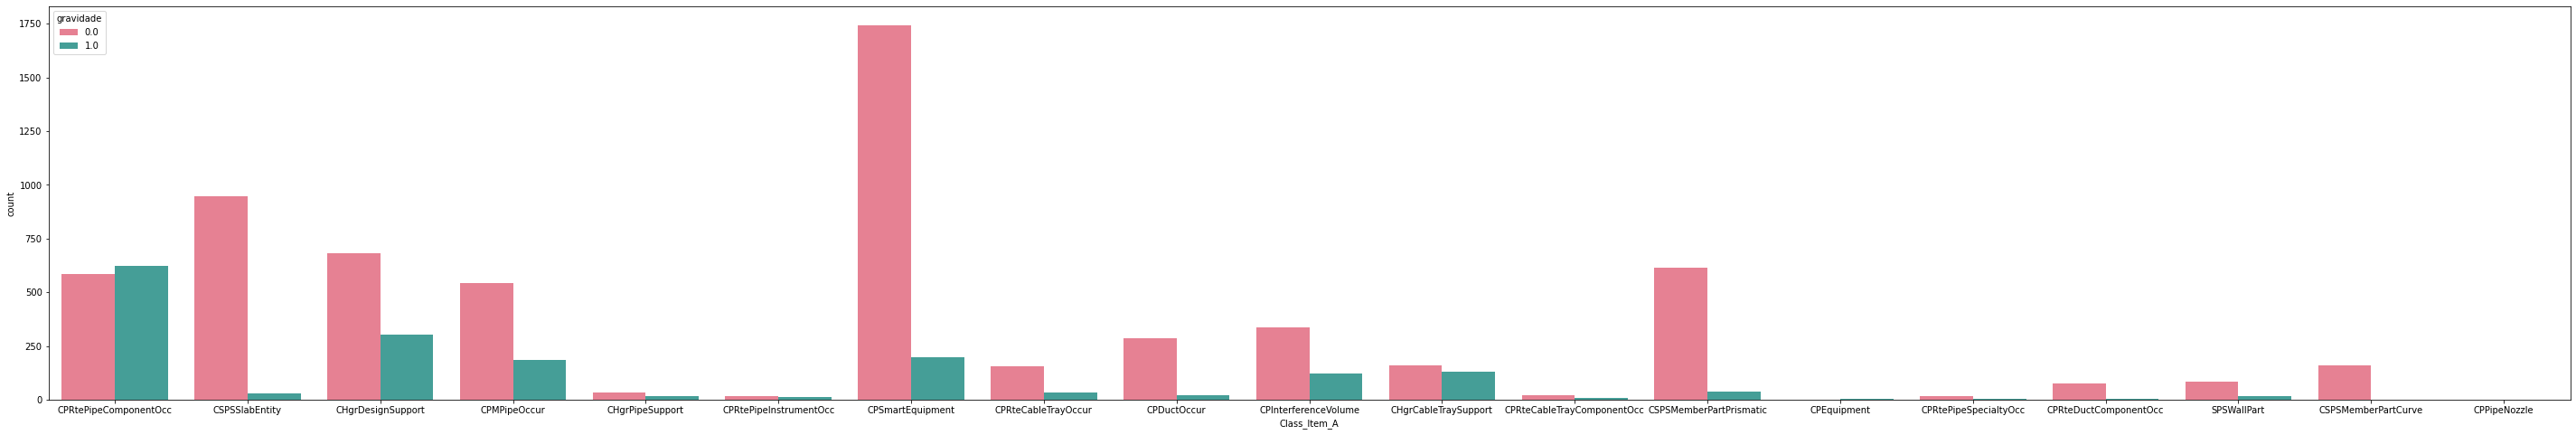

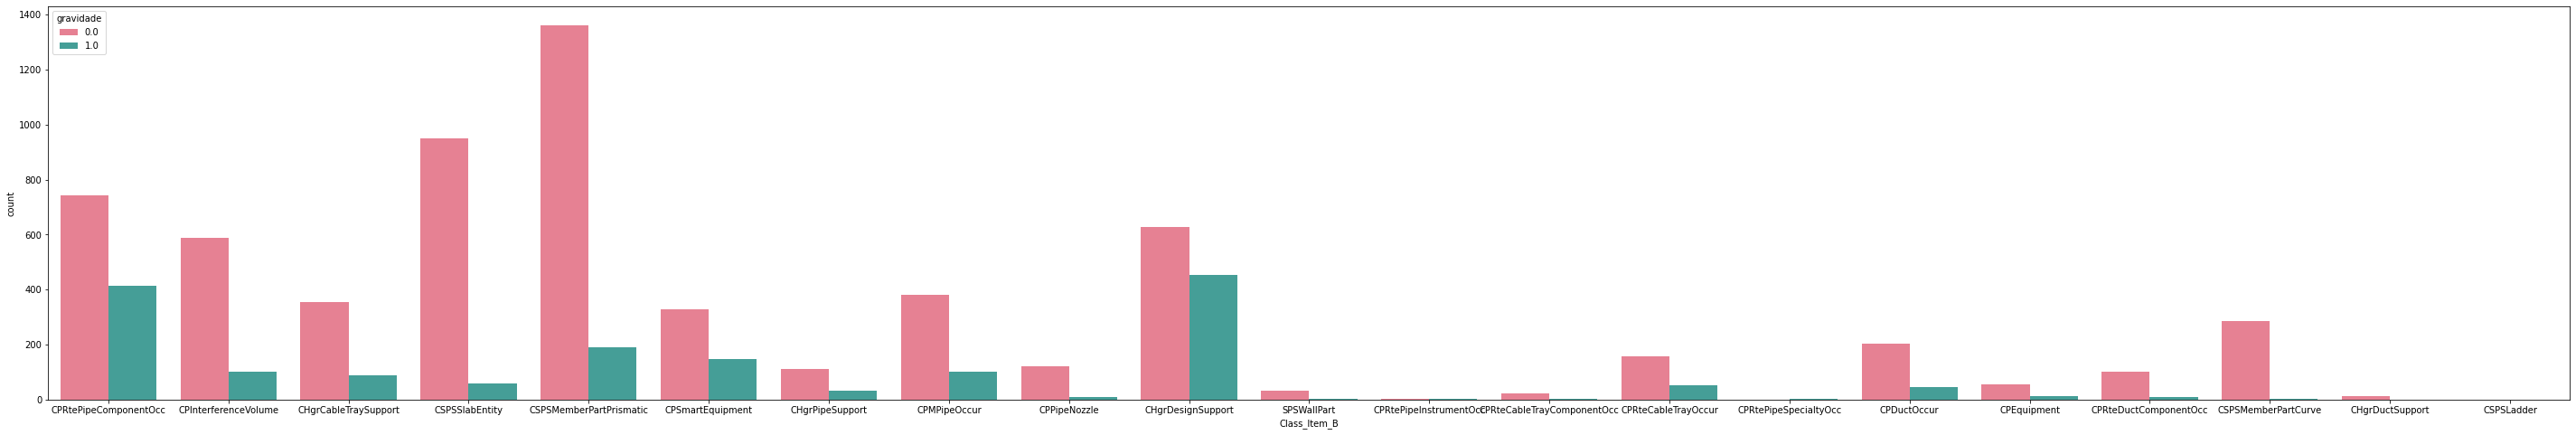

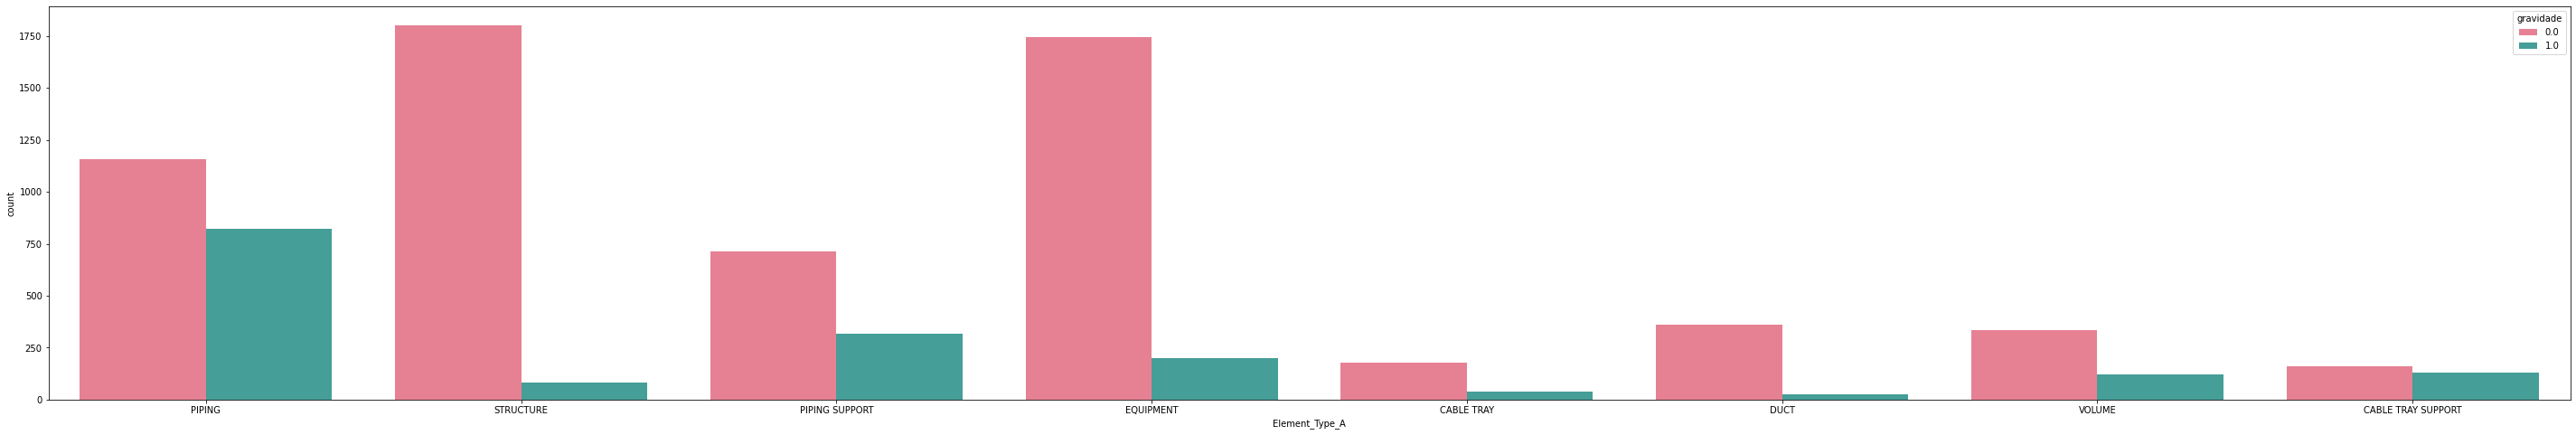

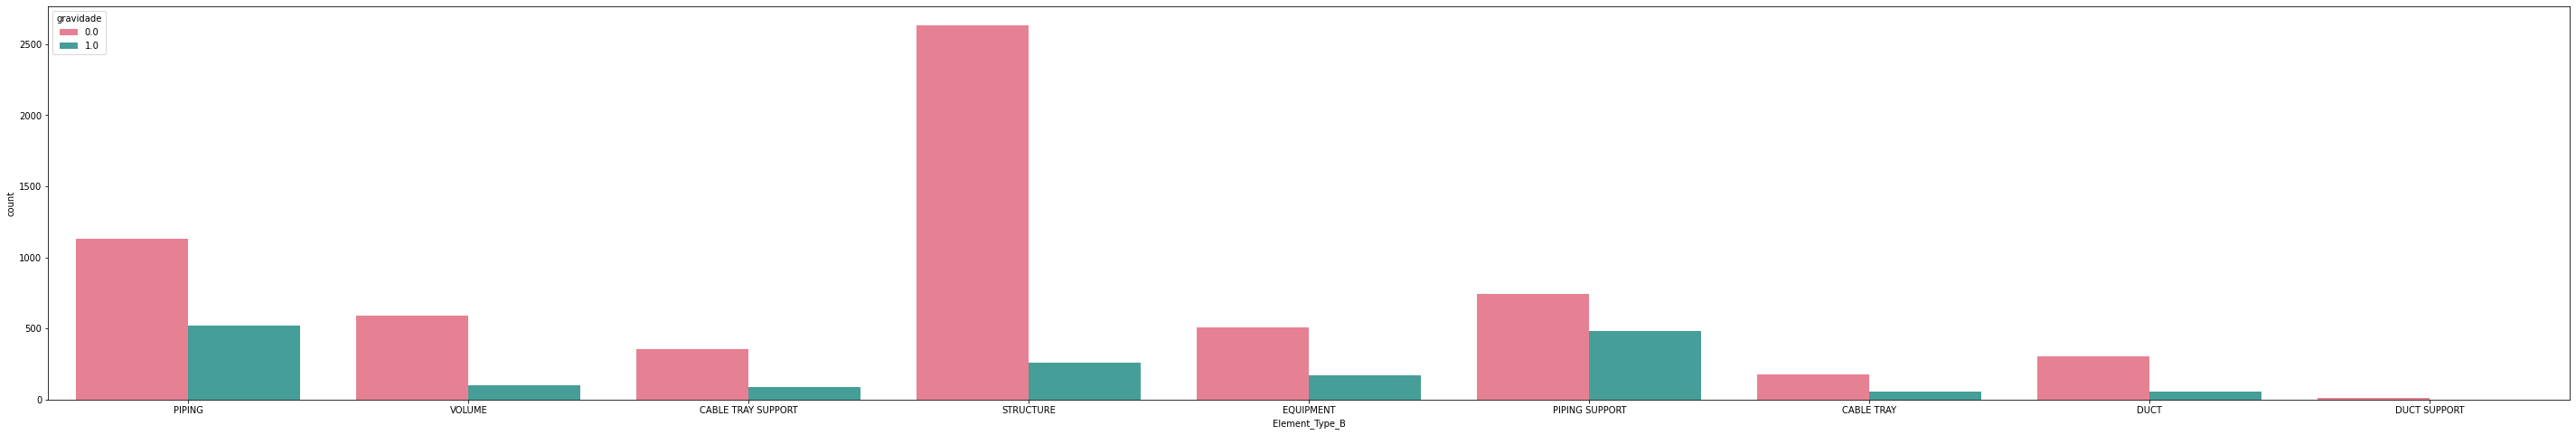

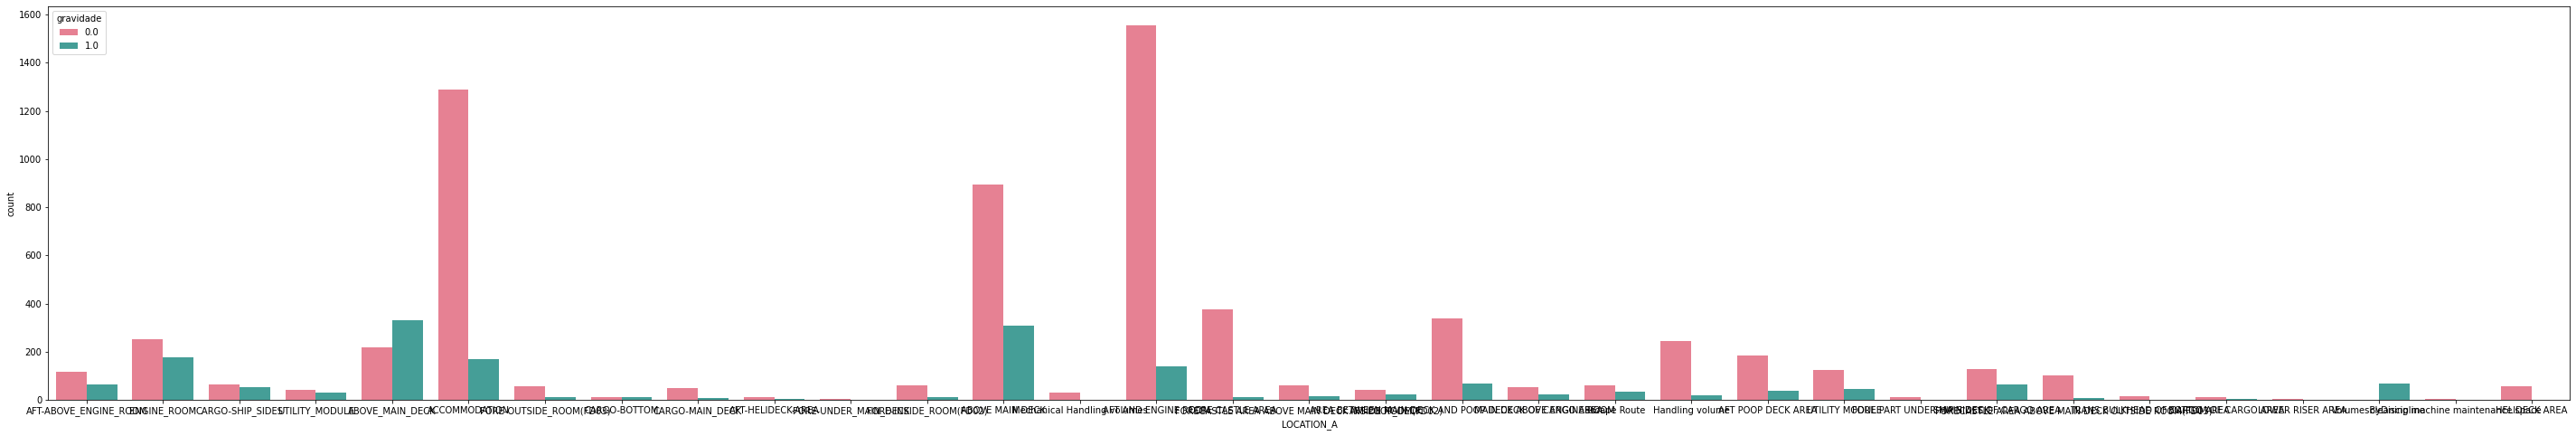

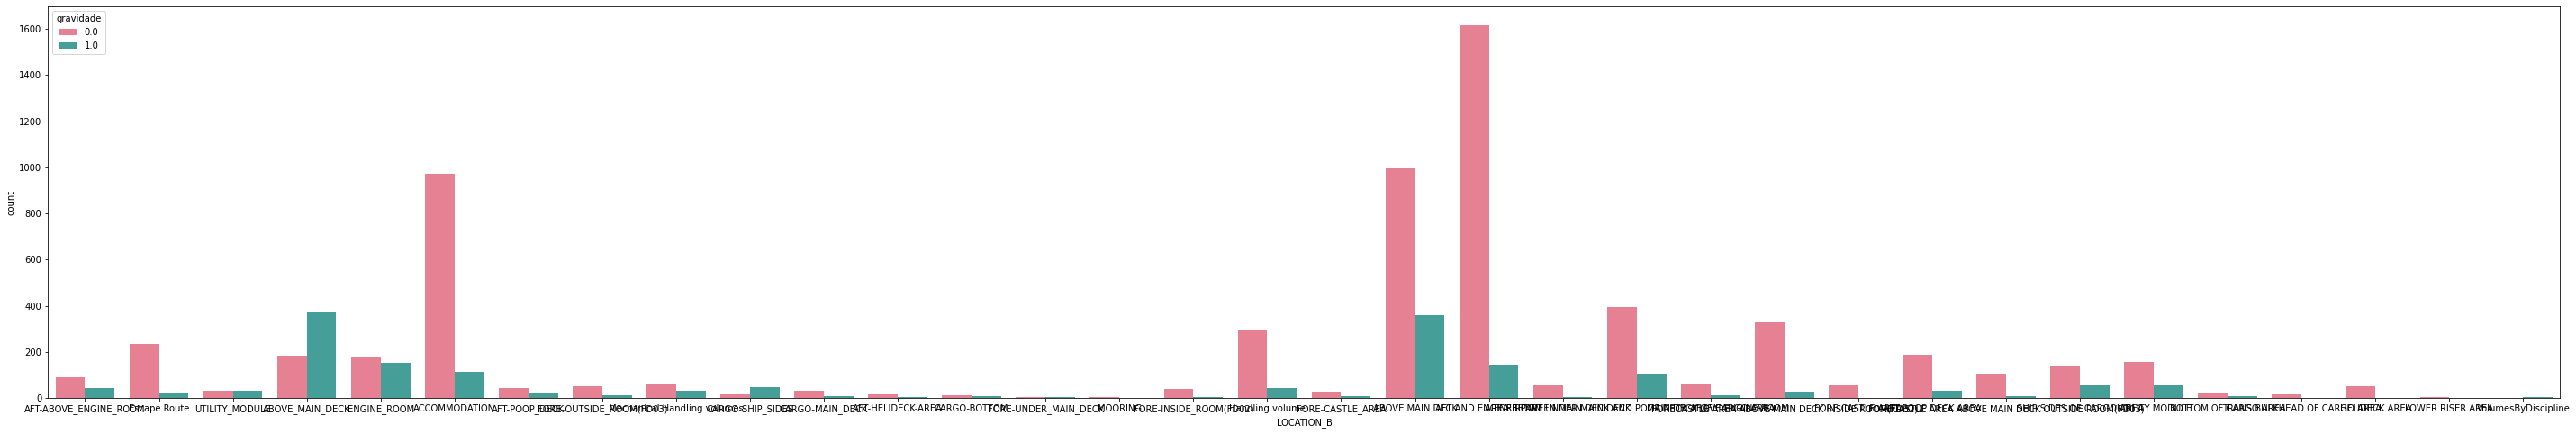

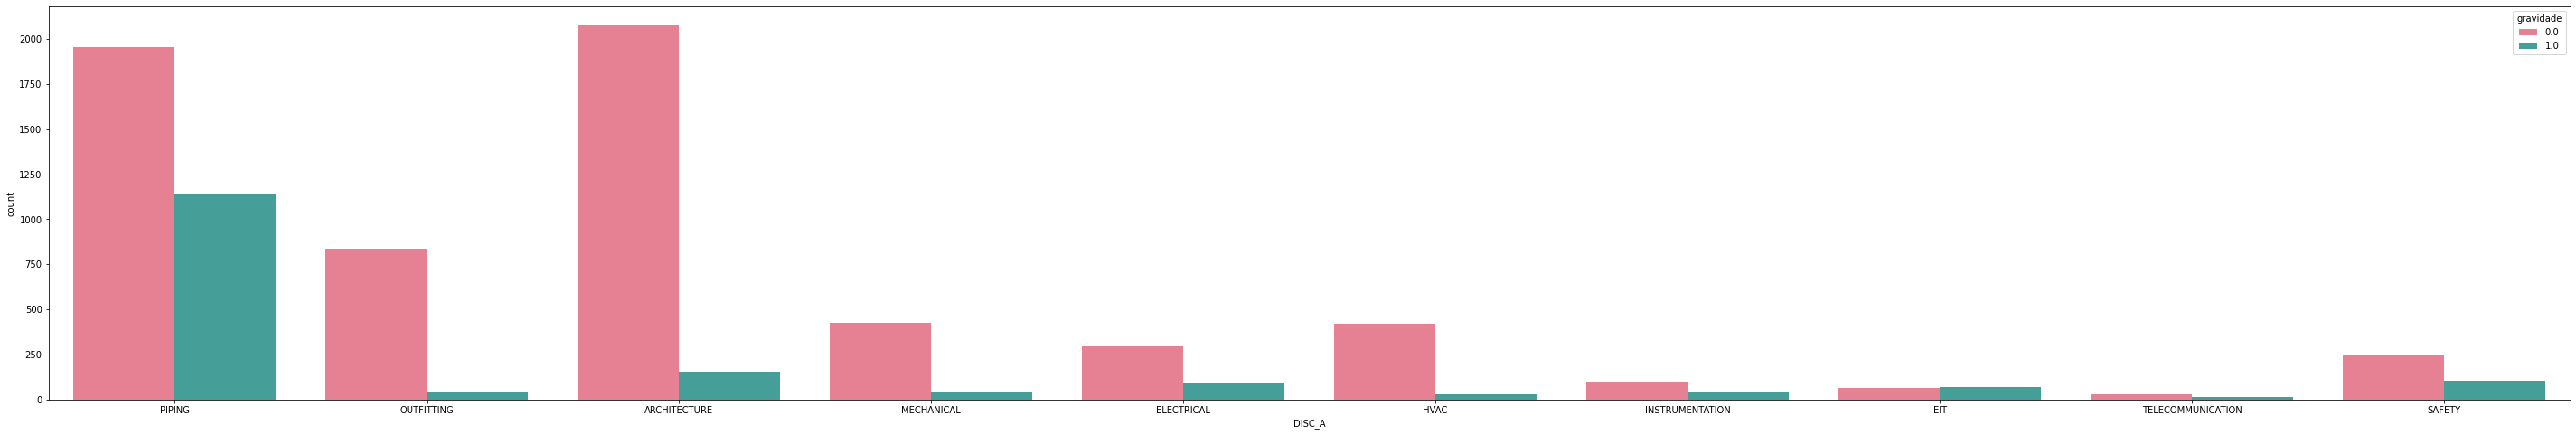

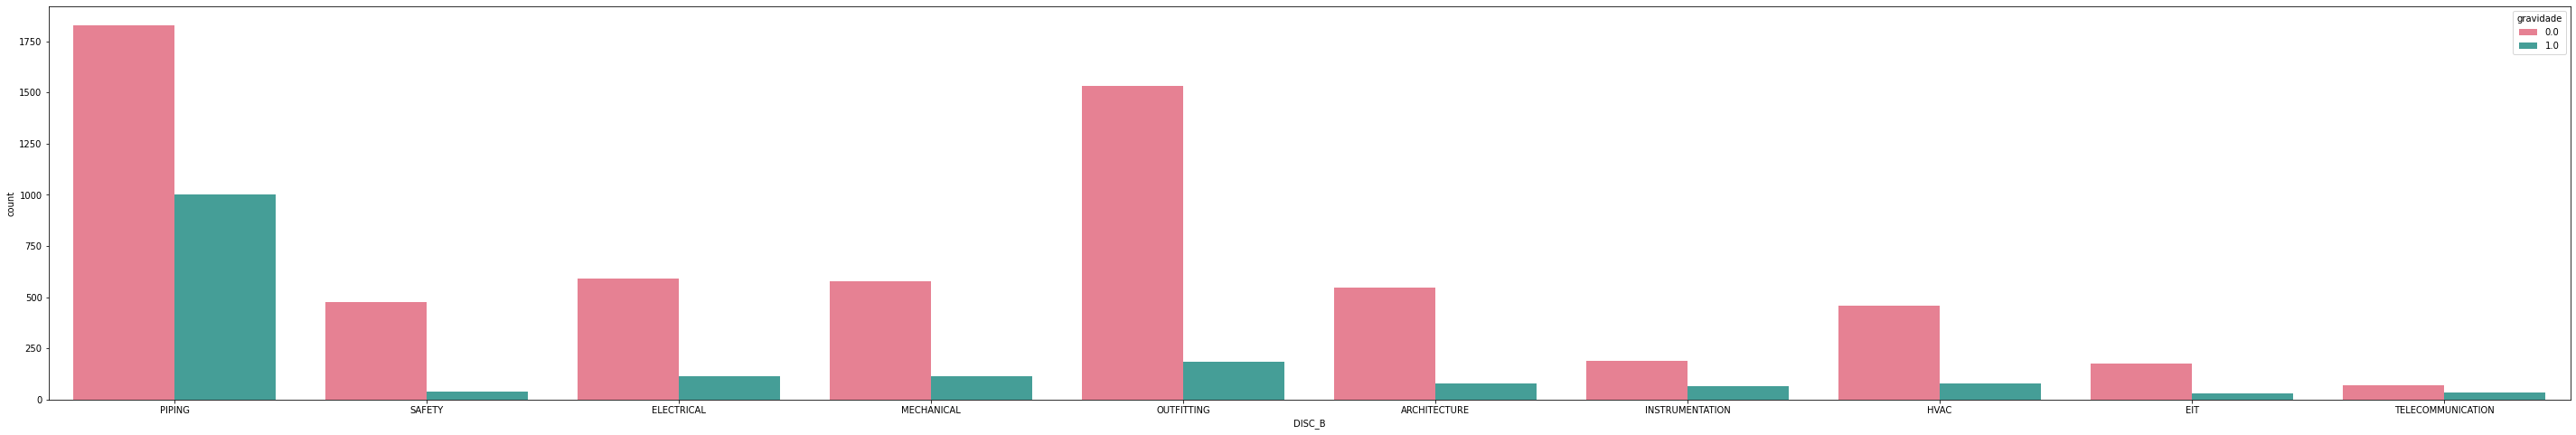

In [10]:
# Visualizar Atributos categóricos
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='Class_Item_A', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='Class_Item_B', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='Element_Type_A', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='Element_Type_B', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='LOCATION_A', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='LOCATION_B', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='DISC_A', hue='gravidade', palette='husl')
plt.show()
plt.figure(figsize=(50,8))
sns.countplot(data=data, x='DISC_B', hue='gravidade', palette='husl')
plt.show()

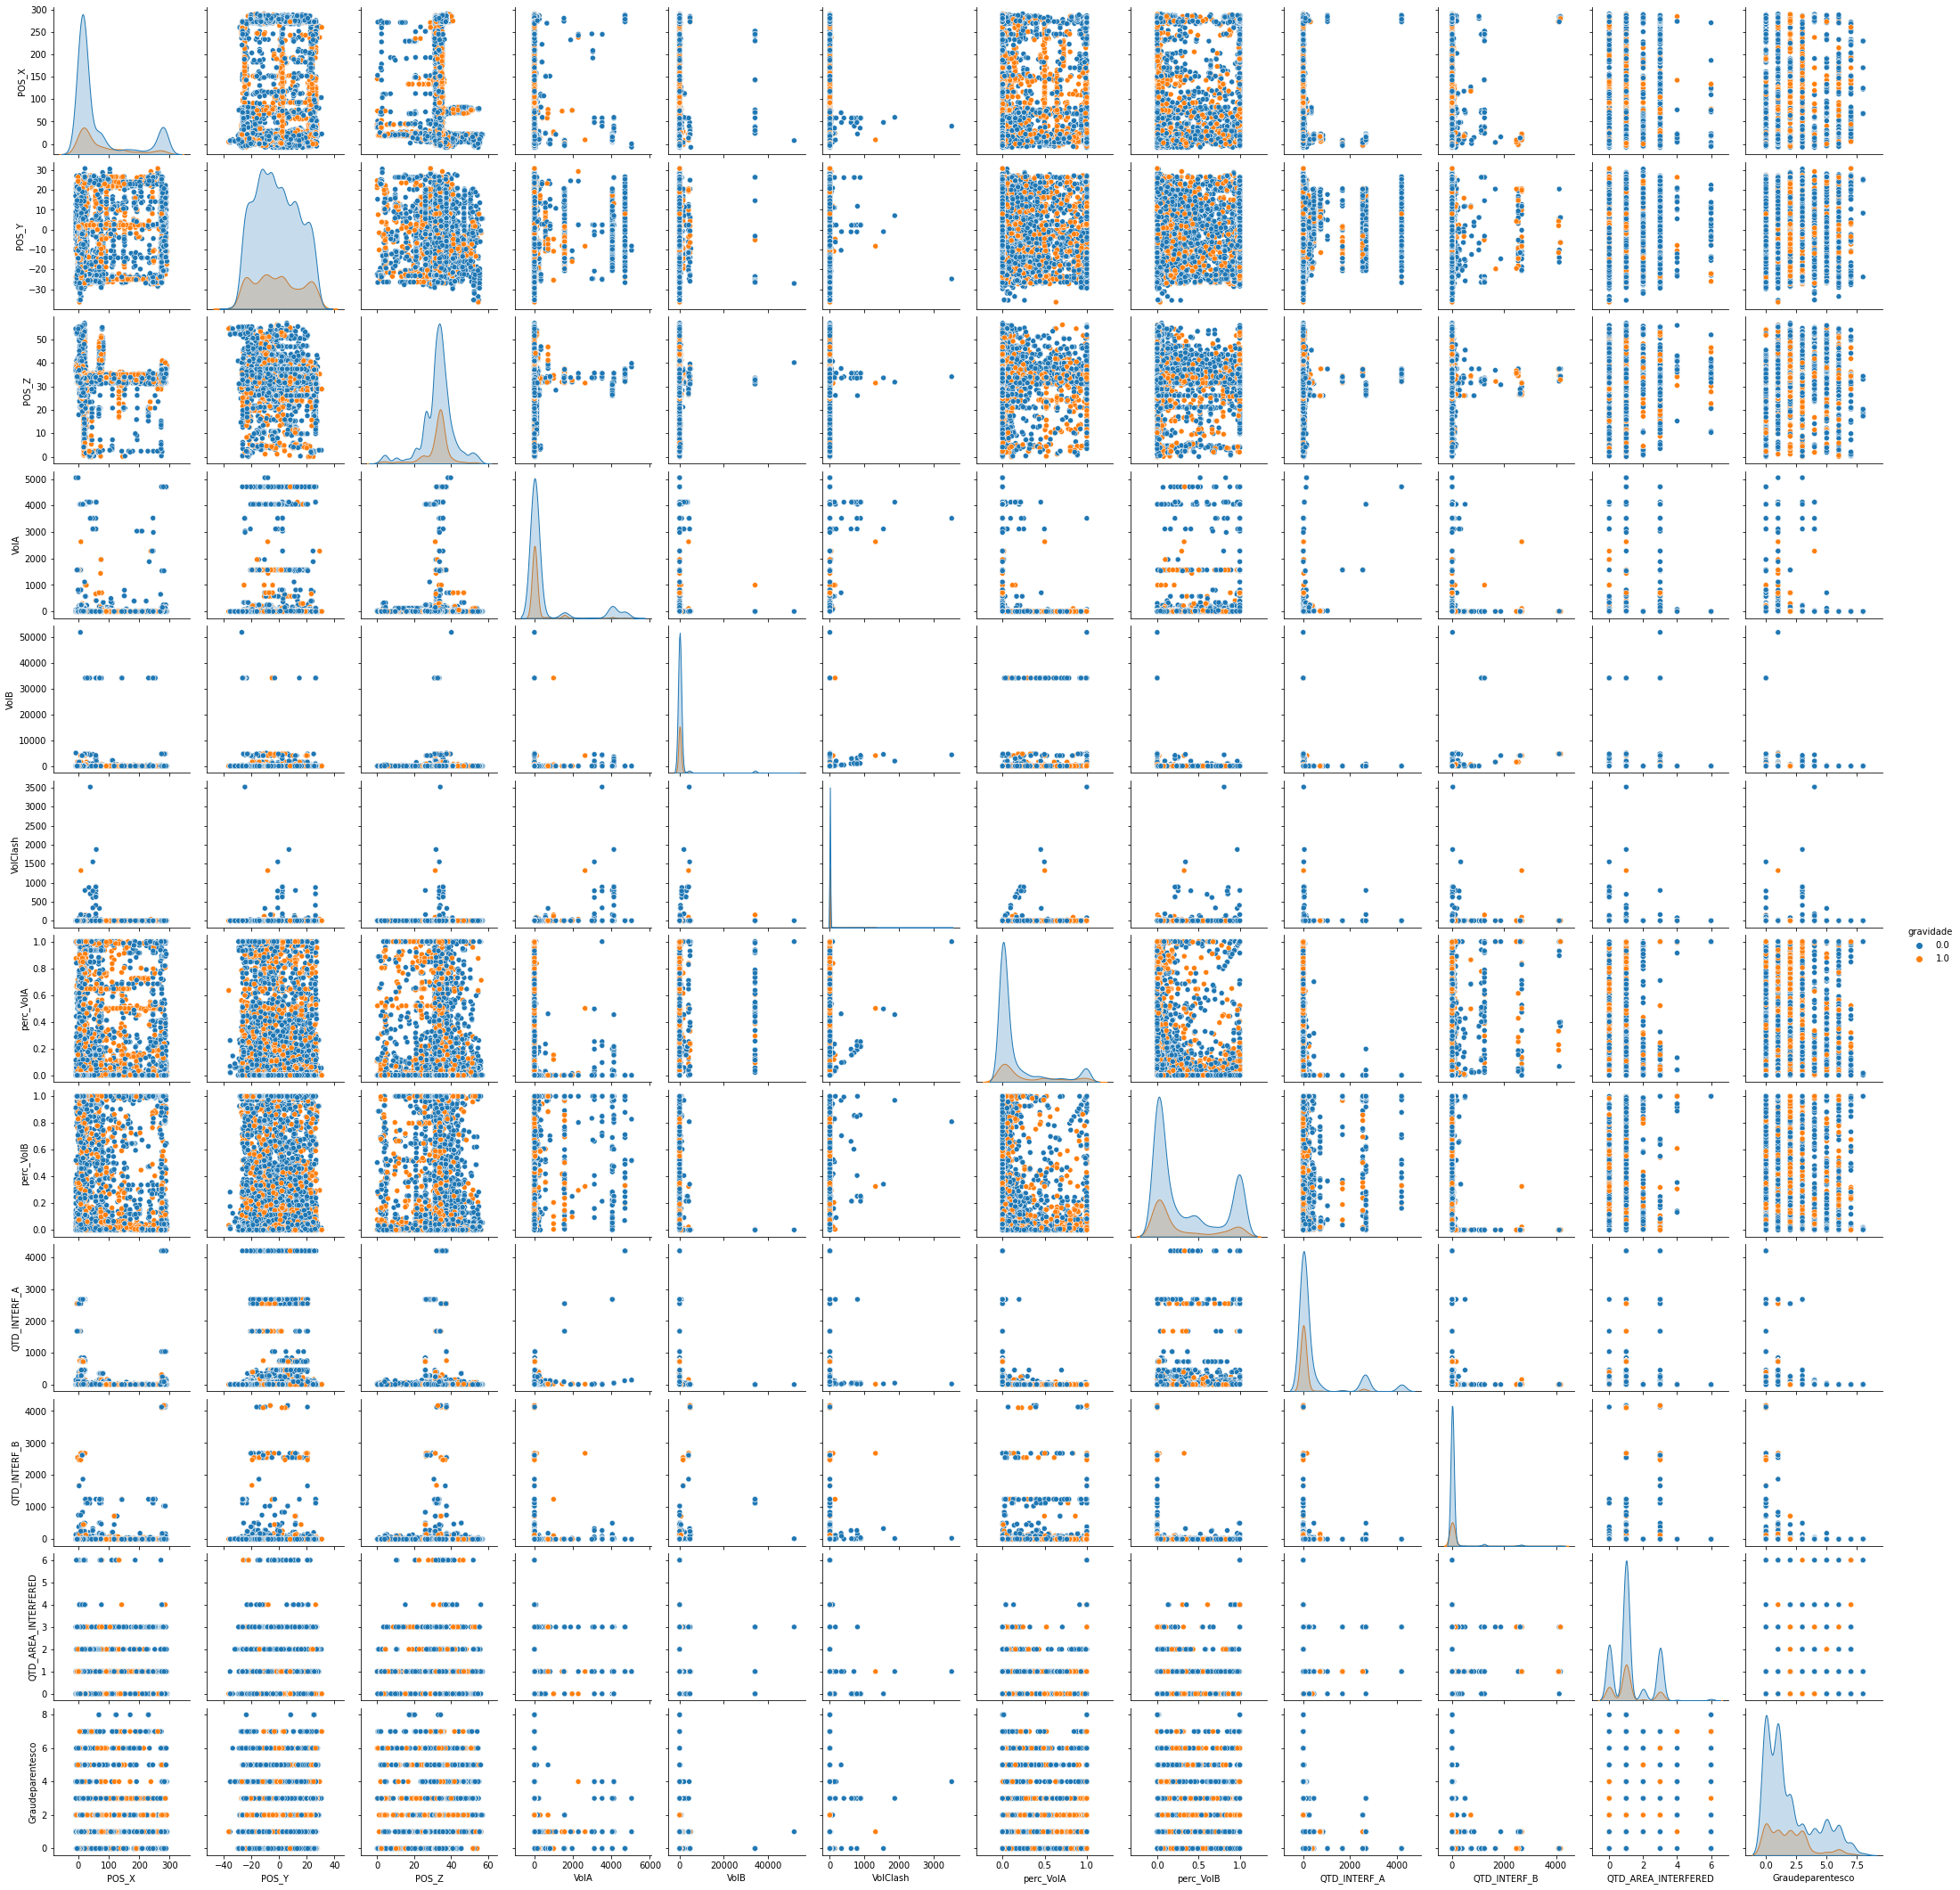

In [11]:
# Visualizar Atributos numéricos
sns.pairplot(data, hue='gravidade')
plt.show()

**Separar bases de treino e teste**

In [39]:
data_X = data.loc[:,data.columns != 'gravidade']
data_Y = data['gravidade']

In [40]:
# semente para reprodução de resultados
seed=999

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, stratify=data_Y, random_state=seed)

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (18932, 21)
shape input de teste:  (4734, 21)
shape output de treino:  (18932,)
shape output de teste:  (4734,)


In [41]:
#treino
print(0.8 * data['gravidade'].value_counts()[0])
print(0.8 * data['gravidade'].value_counts()[1])

#test
print(0.2 * data['gravidade'].value_counts()[0])
print(0.2 * data['gravidade'].value_counts()[1])

15371.2
3561.6000000000004
3842.8
890.4000000000001


**Balanceamento**

In [42]:
y_train.mean()

0.1880942319881682

In [43]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
data_X_over, data_Y_over = oversample.fit_resample(X_train, y_train)

data_X_over = pd.DataFrame(data_X_over,columns=data_X.columns)
#data_Y_over = pd.DataFrame(data_Y_over)

X_train = data_X_over
y_train = data_Y_over

print('shape input de treino: ', X_train.shape)
print('shape input de teste: ', X_test.shape)
print('shape output de treino: ', y_train.shape)
print('shape output de teste: ', y_test.shape)

shape input de treino:  (30742, 21)
shape input de teste:  (4734, 21)
shape output de treino:  (30742,)
shape output de teste:  (4734,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
y_train.mean()

0.5

**Normalização dos atributos numéricos**

In [46]:
from sklearn.preprocessing import StandardScaler
X_train_num = X_train[['POS_X','POS_Y','POS_Z','VolA','VolB','VolClash','perc_VolA','perc_VolB','QTD_INTERF_A','QTD_INTERF_B','QTD_AREA_INTERFERED','Graudeparentesco']]
X_test_num = X_test[['POS_X','POS_Y','POS_Z','VolA','VolB','VolClash','perc_VolA','perc_VolB','QTD_INTERF_A','QTD_INTERF_B','QTD_AREA_INTERFERED','Graudeparentesco']]

scaler = StandardScaler().fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_test_num = scaler.transform(X_test_num)

X_train_num = pd.DataFrame(X_train_num,columns=X_train[['POS_X','POS_Y','POS_Z','VolA','VolB','VolClash','perc_VolA','perc_VolB','QTD_INTERF_A','QTD_INTERF_B','QTD_AREA_INTERFERED','Graudeparentesco']].columns, index=X_train.index)
X_test_num = pd.DataFrame(X_test_num,columns=X_test[['POS_X','POS_Y','POS_Z','VolA','VolB','VolClash','perc_VolA','perc_VolB','QTD_INTERF_A','QTD_INTERF_B','QTD_AREA_INTERFERED','Graudeparentesco']].columns, index=X_test.index)


In [47]:
X_train = pd.concat([X_train_num[:],X_train[['Class_Item_A','Element_Type_A','LOCATION_A','DISC_A','Class_Item_B','Element_Type_B','LOCATION_B','DISC_B','clash_on_object']]],axis=1)
X_test = pd.concat([X_test_num[:],X_test[['Class_Item_A','Element_Type_A','LOCATION_A','DISC_A','Class_Item_B','Element_Type_B','LOCATION_B','DISC_B','clash_on_object']]],axis=1)

**Transformar inputs categóricos em numérico: dummy coding**

In [48]:
#criando função One Hot Encoding
def get_OHE(df):
  df_OHE = pd.concat([df[['POS_X','POS_Y','POS_Z','VolA','VolB','VolClash','perc_VolA','perc_VolB','QTD_INTERF_A','QTD_INTERF_B','QTD_AREA_INTERFERED','Graudeparentesco']],
                      pd.get_dummies(df[['Class_Item_A','Element_Type_A','LOCATION_A','DISC_A','Class_Item_B','Element_Type_B','LOCATION_B','DISC_B','clash_on_object']],drop_first=True)],axis=1)
  return df_OHE

In [49]:
#utilizando função One Hot Encoding
X_train = get_OHE(X_train)
X_test = get_OHE(X_test)

In [50]:
#formato das bases
X_train.shape, X_test.shape

((30742, 156), (4734, 151))

In [51]:
#verificar colunas faltantes na base de teste
for x in X_train.columns:
  a=0
  for y in X_test.columns:
    if x == y:
      a=1
  if a==0:
    print(x)

LOCATION_A_LOWER RISER AREA
Class_Item_B_CPRtePipeSpecialtyOcc
LOCATION_B_LOWER RISER AREA
LOCATION_B_VolumesByDiscipline
LOCATION_B_cleaning machine maintenance space


In [52]:
#adicionar colunas faltantes na base de testes
X_test.loc[:,'LOCATION_A_LOWER RISER AREA'] = 0
X_test.loc[:,'Class_Item_B_CPRtePipeSpecialtyOcc'] = 0
X_test.loc[:,'LOCATION_B_LOWER RISER AREA'] = 0
X_test.loc[:,'LOCATION_B_VolumesByDiscipline'] = 0
X_test.loc[:,'LOCATION_B_cleaning machine maintenance space'] = 0


In [53]:
#formato das bases
X_train.shape, X_test.shape

((30742, 156), (4734, 156))

## **Classificação**

In [54]:
# opção 1 - XGB
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.72,n_estimators=120,max_depth=3,colsample_bytree=1,gamma=0)
model.fit(X_train, y_train)

# métrica de treino
print('Métrica de treino: %.3f' % model.score(X_train, y_train))
# Avaliar modelo treinado na base de teste
X_test = X_test[model.get_booster().feature_names]
print('Acurácia: %.3f' % model.score(X_test, y_test)) # acurácia
y_pred = model.predict(X_test) #inferência do teste

from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
acfn=1-(confMatrix[0,1]/(confMatrix[0,1]+confMatrix[1,1]))
print('Acurácia contra falsos negativos: %.3f' % acfn) # acurácia
print('0.5*Acurácia + 0.5*Acurácia contra falsos negativos = %.3f' %(0.5*model.score(X_test, y_test)+0.5*acfn))
# Matriz de confusão
pd.DataFrame(confMatrix, index=['Previsto Não Grave', 'Previsto Grave'], columns=['Real Não Grave', 'Real Grave'])


Métrica de treino: 0.921
Acurácia: 0.871
Acurácia contra falsos negativos: 0.841
0.5*Acurácia + 0.5*Acurácia contra falsos negativos = 0.856


,Real Não Grave,Real Grave
Previsto Não Grave,3376,142
Previsto Grave,467,749


In [55]:
# opção 2 - árvore de decisão
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=33, min_samples_split=2, min_samples_leaf=3,
                               min_weight_fraction_leaf=0.0, max_features=42, max_leaf_nodes=800, class_weight={0: 0.5, 1: 1}, random_state=seed)
model.fit(X_train, y_train)
# métrica de treino
print('Métrica de treino: %.3f' % model.score(X_train, y_train))
# Avaliar modelo treinado na base de teste
print('Acurácia: %.3f' % model.score(X_test, y_test)) # acurácia
y_pred = model.predict(X_test) #inferência do teste
confMatrix = confusion_matrix(y_pred, y_test)
acfn=1-(confMatrix[0,1]/(confMatrix[0,1]+confMatrix[1,1]))
acuracia_media=0.5*model.score(X_test, y_test)+0.5*acfn
print('Acurácia contra falsos negativos: %.3f' % acfn) # acurácia
print('0.5*Acurácia + 0.5*Acurácia contra falsos negativos = %.3f' %acuracia_media)
# Matriz de confusão
pd.DataFrame(confMatrix, index=['Previsto Não Grave', 'Previsto Grave'], columns=['Real Não Grave', 'Real Grave'])

Métrica de treino: 0.944
Acurácia: 0.863
Acurácia contra falsos negativos: 0.853
0.5*Acurácia + 0.5*Acurácia contra falsos negativos = 0.858


,Real Não Grave,Real Grave
Previsto Não Grave,3325,131
Previsto Grave,518,760


In [56]:
# opção 3 - SVM
from sklearn.svm import SVC

def trainSVM(X_train, y_train, seed):
  model = SVC(class_weight={0: 0.5, 1: 1},random_state=seed, kernel='rbf',gamma=0.2, C=1)
  model.fit(X_train, y_train)
  return model

model = trainSVM(X_train, y_train, seed)

# métrica de treino
print('Métrica de treino: %.3f' % model.score(X_train, y_train))
# Avaliar modelo treinado na base de teste
print('Acurácia: %.3f' % model.score(X_test, y_test)) # acurácia
y_pred = model.predict(X_test) #inferência do teste

from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_pred, y_test)
acfn=1-(confMatrix[0,1]/(confMatrix[0,1]+confMatrix[1,1]))
print('Acurácia contra falsos negativos: %.3f' % acfn) # acurácia
print('0.5*Acurácia + 0.5*Acurácia contra falsos negativos = %.3f' %(0.5*model.score(X_test, y_test)+0.5*acfn))
# Matriz de confusão
pd.DataFrame(confMatrix, index=['Previsto Não Grave', 'Previsto Grave'], columns=['Real Não Grave', 'Real Grave'])

Métrica de treino: 0.916
Acurácia: 0.839
Acurácia contra falsos negativos: 0.872
0.5*Acurácia + 0.5*Acurácia contra falsos negativos = 0.856


,Real Não Grave,Real Grave
Previsto Não Grave,3195,114
Previsto Grave,648,777


In [59]:
# opção 4 - RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(max_depth=30,max_features='auto',min_samples_leaf=4,min_samples_split=2,criterion='gini', 
                               class_weight={0: 0.5, 1: 1}, n_estimators=200, random_state=seed)
model.fit(X_train, y_train)
# Mostrando importância de cada feature
#model.feature_importances_
#importances = pd.Series(data=model.feature_importances_, index = X_train.columns)
#sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

# métrica de treino
print('Métrica de treino: %.3f' % model.score(X_train, y_train))
# Avaliar modelo treinado na base de teste
print('Acurácia: %.3f' % model.score(X_test, y_test)) # acurácia
y_pred = model.predict(X_test) #inferência do teste     
confMatrix = confusion_matrix(y_pred, y_test)
acfn=1-(confMatrix[0,1]/(confMatrix[0,1]+confMatrix[1,1]))
print('Acurácia contra falsos negativos: %.3f' % acfn) # acurácia
acuracia_media=(0.5*model.score(X_test, y_test)+0.5*acfn)
print('0.5*Acurácia + 0.5*Acurácia contra falsos negativos = %.3f' %acuracia_media)
# Matriz de confusão
pd.DataFrame(confMatrix, index=['Previsto Não Grave', 'Previsto Grave'], columns=['Real Não Grave', 'Real Grave'])  

Métrica de treino: 0.949
Acurácia: 0.873
Acurácia contra falsos negativos: 0.895
0.5*Acurácia + 0.5*Acurácia contra falsos negativos = 0.884


,Real Não Grave,Real Grave
Previsto Não Grave,3334,94
Previsto Grave,509,797


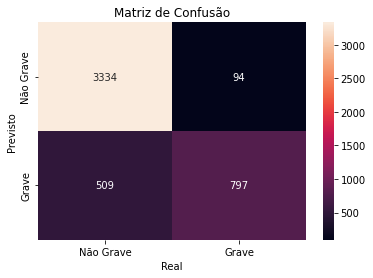

In [60]:
ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')

# Colocar os nomes
ax.xaxis.set_ticklabels(['Não Grave', 'Grave']) 
ax.yaxis.set_ticklabels(['Não Grave', 'Grave'])
plt.show()